In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train  = pd.read_csv(r"E:\FlipRobo Technologies\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
test = pd.read_csv(r"E:\FlipRobo Technologies\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")

In [3]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train.shape

(159571, 8)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
train.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [7]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
test.shape

(153164, 2)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [11]:
test.nunique()

id              153164
comment_text    153164
dtype: int64

In [12]:
train['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [13]:
train['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [14]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [15]:
import string
import re
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def clean_comment(comment):
    comment = comment.lower()     # lower the comments
    comment = re.sub('https:?//\S+|WWW\.\S+','',comment)    # clean the urls
    comment = re.sub('<.*?>+', '', comment)
    comment = re.sub('[%s]' % re.escape(string.punctuation), '', comment)  # remove the punctuations
    comment = re.sub('\n','',comment)  # removes \n
    comment = re.sub('\w*\d\w*' ,'', comment)
    return comment

In [18]:
train['comment_text'] = train['comment_text'].apply(lambda x : clean_comment(x))

In [19]:
train['comment_text']

0         explanationwhy the edits made under my usernam...
1         daww he matches this background colour im seem...
2         hey man im really not trying to edit war its j...
3         morei cant make any real suggestions on improv...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and  i really dont think you understand  i cam...
Name: comment_text, Length: 159571, dtype: object

In [20]:
test['comment_text'] = test['comment_text'].apply(lambda x : clean_comment(x))

In [21]:
test['comment_text']

0         yo bitch ja rule is more succesful then youll ...
1                 from rfc   the title is fine as it is imo
2                   sources    zawe ashton on lapland —    
3         if you have a look back at the source the info...
4                   i dont anonymously edit articles at all
                                ...                        
153159      i totally agree this stuff is nothing but to...
153160     throw from out field to home plate   does it ...
153161       okinotorishima categories   i see your chan...
153162       one of the founding nations of the eu  germ...
153163      stop already your bullshit is not welcome he...
Name: comment_text, Length: 153164, dtype: object

In [22]:
def tokenizer(comment):
    return nltk.word_tokenize(comment)

In [23]:
new_stopwords = stopwords.words('english')

def stopwords_remover(comment):
    
    comment_list = [word for word in comment if word not in new_stopwords]
    return comment_list

In [24]:
wordnet = nltk.WordNetLemmatizer()


def _lemmatizer(comment):
    comment_text = [wordnet.lemmatize(word) for word in comment ]
    return comment_text

In [25]:
len(new_stopwords)

179

In [26]:
train['comment_text'] = train['comment_text'].apply(lambda x : tokenizer(x))

In [27]:
train['comment_text']

0         [explanationwhy, the, edits, made, under, my, ...
1         [daww, he, matches, this, background, colour, ...
2         [hey, man, im, really, not, trying, to, edit, ...
3         [morei, cant, make, any, real, suggestions, on...
4         [you, sir, are, my, hero, any, chance, you, re...
                                ...                        
159566    [and, for, the, second, time, of, asking, when...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, theres, no, actual, article, fo...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, i, really, dont, think, you, understand,...
Name: comment_text, Length: 159571, dtype: object

In [29]:
train['comment_text'] = train['comment_text'].apply(lambda x : _lemmatizer(x))

In [30]:
train['comment_text']

0         [explanationwhy, the, edits, made, under, my, ...
1         [daww, he, match, this, background, colour, im...
2         [hey, man, im, really, not, trying, to, edit, ...
3         [morei, cant, make, any, real, suggestion, on,...
4         [you, sir, are, my, hero, any, chance, you, re...
                                ...                        
159566    [and, for, the, second, time, of, asking, when...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, there, no, actual, article, for...
159569    [and, it, look, like, it, wa, actually, you, w...
159570    [and, i, really, dont, think, you, understand,...
Name: comment_text, Length: 159571, dtype: object

In [31]:
train['comment_text'] = train['comment_text'].apply(lambda x : stopwords_remover(x))

In [32]:
train['comment_text']

0         [explanationwhy, edits, made, username, hardco...
1         [daww, match, background, colour, im, seemingl...
2         [hey, man, im, really, trying, edit, war, guy,...
3         [morei, cant, make, real, suggestion, improvem...
4                [sir, hero, chance, remember, page, thats]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567          [ashamed, horrible, thing, put, talk, page]
159568    [spitzer, umm, actual, article, prostitution, ...
159569    [look, like, wa, actually, put, speedy, first,...
159570    [really, dont, think, understand, came, idea, ...
Name: comment_text, Length: 159571, dtype: object

In [33]:
def str_converter(comment):
    string = [str(text) for text in comment]
    com = ",".join(string)
    return com

In [34]:
train['comment_text'] = train['comment_text'].apply(lambda x : str_converter(x))

In [35]:
train['comment_text']

0         explanationwhy,edits,made,username,hardcore,me...
1         daww,match,background,colour,im,seemingly,stuc...
2         hey,man,im,really,trying,edit,war,guy,constant...
3         morei,cant,make,real,suggestion,improvement,wo...
4                       sir,hero,chance,remember,page,thats
                                ...                        
159566    second,time,asking,view,completely,contradicts...
159567                 ashamed,horrible,thing,put,talk,page
159568    spitzer,umm,actual,article,prostitution,ring,c...
159569    look,like,wa,actually,put,speedy,first,version...
159570    really,dont,think,understand,came,idea,wa,bad,...
Name: comment_text, Length: 159571, dtype: object

In [36]:
test['comment_text'] = test['comment_text'].apply(lambda x: tokenizer(x))

In [37]:
test['comment_text']

0         [yo, bitch, ja, rule, is, more, succesful, the...
1         [from, rfc, the, title, is, fine, as, it, is, ...
2                   [sources, zawe, ashton, on, lapland, —]
3         [if, you, have, a, look, back, at, the, source...
4           [i, dont, anonymously, edit, articles, at, all]
                                ...                        
153159    [i, totally, agree, this, stuff, is, nothing, ...
153160    [throw, from, out, field, to, home, plate, doe...
153161    [okinotorishima, categories, i, see, your, cha...
153162    [one, of, the, founding, nations, of, the, eu,...
153163    [stop, already, your, bullshit, is, not, welco...
Name: comment_text, Length: 153164, dtype: object

In [38]:
test['comment_text'] = test['comment_text'].apply(lambda x: _lemmatizer(x))

In [39]:
test['comment_text']

0         [yo, bitch, ja, rule, is, more, succesful, the...
1         [from, rfc, the, title, is, fine, a, it, is, imo]
2                    [source, zawe, ashton, on, lapland, —]
3         [if, you, have, a, look, back, at, the, source...
4            [i, dont, anonymously, edit, article, at, all]
                                ...                        
153159    [i, totally, agree, this, stuff, is, nothing, ...
153160    [throw, from, out, field, to, home, plate, doe...
153161    [okinotorishima, category, i, see, your, chang...
153162    [one, of, the, founding, nation, of, the, eu, ...
153163    [stop, already, your, bullshit, is, not, welco...
Name: comment_text, Length: 153164, dtype: object

In [40]:
test['comment_text'] = test['comment_text'].apply(lambda x: stopwords_remover(x))

In [41]:
test['comment_text']

0         [yo, bitch, ja, rule, succesful, youll, ever, ...
1                                   [rfc, title, fine, imo]
2                        [source, zawe, ashton, lapland, —]
3         [look, back, source, information, updated, wa,...
4                        [dont, anonymously, edit, article]
                                ...                        
153159        [totally, agree, stuff, nothing, toolongcrap]
153160    [throw, field, home, plate, doe, get, faster, ...
153161    [okinotorishima, category, see, change, agree,...
153162    [one, founding, nation, eu, germany, ha, law, ...
153163    [stop, already, bullshit, welcome, im, fool, t...
Name: comment_text, Length: 153164, dtype: object

In [42]:
test['comment_text'] = test['comment_text'].apply(lambda x: str_converter(x))

In [43]:
test['comment_text']

0         yo,bitch,ja,rule,succesful,youll,ever,whats,ha...
1                                        rfc,title,fine,imo
2                              source,zawe,ashton,lapland,—
3         look,back,source,information,updated,wa,correc...
4                             dont,anonymously,edit,article
                                ...                        
153159              totally,agree,stuff,nothing,toolongcrap
153160    throw,field,home,plate,doe,get,faster,throwing...
153161    okinotorishima,category,see,change,agree,corre...
153162    one,founding,nation,eu,germany,ha,law,return,q...
153163    stop,already,bullshit,welcome,im,fool,think,ki...
Name: comment_text, Length: 153164, dtype: object

In [44]:
tgt = ['malignant','highly_malignant','rude','threat','abuse','loathe']
target = train[tgt].values

train_df = train['comment_text']
test_df = test['comment_text']

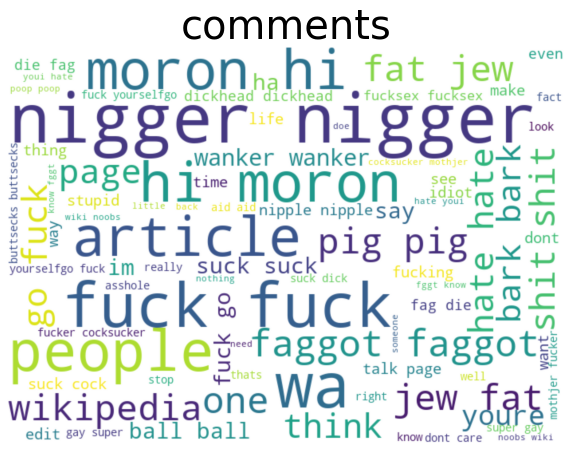

In [45]:
from wordcloud import WordCloud

malignant= train['comment_text'][train['malignant']==1]



word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=80).generate(' '.join(malignant))



plt.figure(figsize=(10,16))

plt.imshow(word_cloud, interpolation = 'gaussian')

plt.title("comments", fontsize =40)

plt.axis('off')

plt.show()

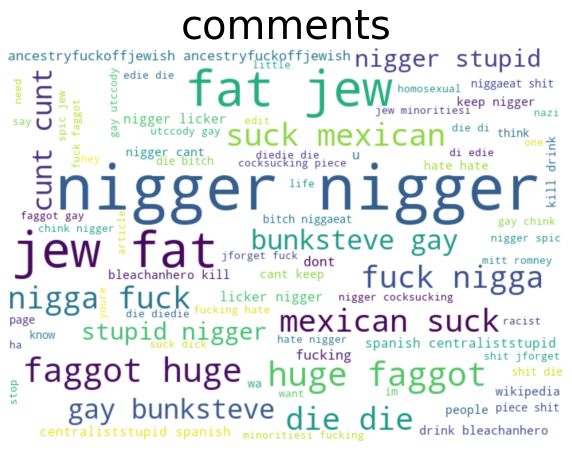

In [46]:
from wordcloud import WordCloud

loathe = train['comment_text'][train['loathe']==1]



word_cloud = WordCloud(width=700,height=500,background_color='white',max_words=80).generate(' '.join(loathe))



plt.figure(figsize=(10,16))

plt.imshow(word_cloud, interpolation = 'gaussian')

plt.title("comments", fontsize =40)

plt.axis('off')

plt.show()

In [47]:
from sklearn.pipeline import make_union

word_vectorizer = TfidfVectorizer(
                    sublinear_tf = True,
                    strip_accents = 'unicode',
                    analyzer = 'word',
                    ngram_range=(1,1),
                    max_features = 30000)

char_vectorizer = TfidfVectorizer(
                    sublinear_tf = True,
                    strip_accents = 'unicode',
                    analyzer = 'char',
                    ngram_range = (1,4), 
                    max_features = 30000)
vectorizer = make_union(word_vectorizer,char_vectorizer, n_jobs = 2)

In [48]:
full_text = pd.concat([train_df,test_df])

In [49]:
vectorizer.fit(full_text)
train_word_features = vectorizer.transform(train_df)
test_word_features = vectorizer.transform(test_df)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
scores = []
submission = pd.DataFrame.from_dict({'id': test['id']})
for class_name in tgt:
    train_target = train[class_name]
    classifier = LogisticRegression(solver='sag')

    cv_score = np.mean(cross_val_score(
        classifier, train_word_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    
    classifier.fit(train_word_features, train_target)
    submission[class_name] = classifier.predict_proba(test_word_features)[:, 1]

CV score for class malignant is 0.9734046372887132
CV score for class highly_malignant is 0.9871293006749258
CV score for class rude is 0.9866448773035792
CV score for class threat is 0.9833735925077168
CV score for class abuse is 0.9788214657528912
CV score for class loathe is 0.9822291758772014


In [51]:
print("Total CV score is {}".format(np.mean(scores)))

Total CV score is 0.9819338415675046


In [52]:
submission

,id,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,0.999542,0.120782,0.999218,0.033493,0.981079,0.190723
1,0000247867823ef7,0.007759,0.004340,0.005274,0.001522,0.012443,0.001838
2,00013b17ad220c46,0.012775,0.002765,0.006236,0.001072,0.006407,0.001634
3,00017563c3f7919a,0.002387,0.001513,0.002327,0.000467,0.002053,0.000353
4,00017695ad8997eb,0.021656,0.000711,0.004452,0.000744,0.007772,0.001885
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.073993,0.001086,0.009970,0.001252,0.022562,0.002686
153160,fffd7a9a6eb32c16,0.048394,0.007708,0.019163,0.006623,0.025024,0.012443
153161,fffda9e8d6fafa9e,0.006937,0.001037,0.006408,0.000779,0.003190,0.001762
153162,fffe8f1340a79fc2,0.021661,0.001346,0.010500,0.001422,0.017386,0.020167


In [53]:
submission.to_csv('malignant_classification_submission.csv',index = False)